## CARGAMOS LAS BASES DE DATOS
Clases:
- Cargar bases de datos JSON, BASE 64
- Cargar bases de datos CSV
- Preprocesamiento de datos

In [1]:
import zipfile
import json
import codecs
import requests
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO
%matplotlib inline

In [2]:
!curl -O https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 68.3M    0  177k    0     0   357k      0  0:03:15 --:--:--  0:03:15  358k
 43 68.3M   43 29.9M    0     0  20.0M      0  0:00:03  0:00:01  0:00:02 20.0M
100 68.3M  100 68.3M    0     0  28.5M      0  0:00:02  0:00:02 --:--:-- 28.5M


In [3]:
# Descomprimimos 
local_zip = 'databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data')
zip_ref.close()

In [4]:
! path

PATH=c:\Users\secur\Documents\Platzi\neural-network\venv\Scripts;C:\Users\secur\Documents\Platzi\neural-network\venv\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Users\secur\AppData\Local\Programs\Python\Python311\Scripts\;C:\Users\secur\AppData\Local\Programs\Python\Python311\;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\Microsoft SQL Server\150\DTS\Binn\;C:\Program Files\Azure Data Studio\bin;C:\Program Files\Git\cmd;C:\Program Files\MATLAB\R2022b\runtime\win64;C:\Program Files\MATLAB\R2022b\bin;C:\Program Files\nodejs\;C:\ProgramData\chocolatey\bin;C:\Program Files (x86)\Microsoft SQL Server\160\Tools\Binn\;C:\Program Files\Microsoft SQL Server\160\Tools\Binn\;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn\;C:\Program Files\Microsoft SQL Server\160\DTS\Binn\;C:\Users\secur\AppData\Local\Microsoft\WindowsApps;;C:\Program Files\Azure Data St

In [5]:
url = r"C:\Users\secur\Documents\Platzi\neural-network\data\sign_mnist_json\data.json"

In [6]:
data_json = []
with codecs.open(url, 'r', 'utf-8') as js:
    for line in js:
        data_json.append(json.loads(line))

print("{} imagenes encontradas".format(len(data_json)))

9 imagenes encontradas


In [7]:
data_json[0]

{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg',
 'label': 'b'}

In [8]:
images = []

for data in data_json:
  response = requests.get(data['content'])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data["label"]])

b


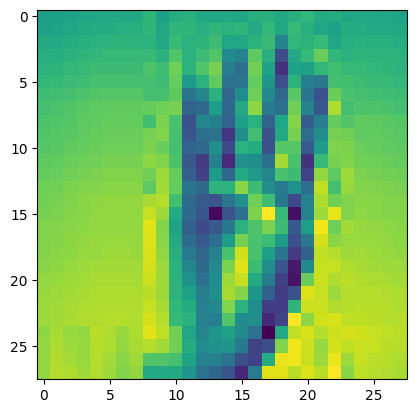

In [9]:
plt.imshow(images[0][0].reshape(28, 28))
print(images[0][1])

In [10]:
url = r"C:\Users\secur\Documents\Platzi\neural-network\data\sign_mnist_base64\data.json"

In [11]:
with open(url) as f:
  data = json.load(f)


In [12]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [13]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = "data\pixeles.png"
with open(path_img, "wb") as file_to_save:
  decoded_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decoded_image_data)

In [14]:
img = Image.open(path_img)
img

In [15]:
train = pd.read_csv("data\sign_mnist_train\sign_mnist_train.csv")
test = pd.read_csv("data\sign_mnist_test\sign_mnist_test.csv")

In [16]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [17]:
train.shape

(27455, 785)

In [18]:
labels = train['label'].values

In [19]:
train.drop('label', axis = 1, inplace = True)

In [20]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [21]:
images = train.values

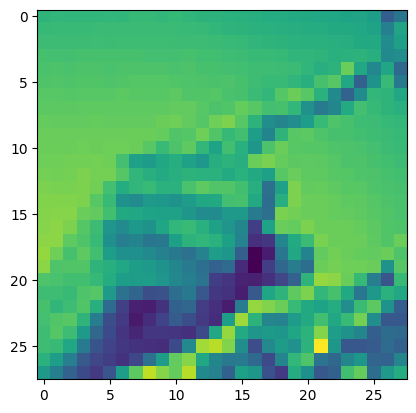

In [22]:
plt.imshow(images[1].reshape(28, 28))

In [23]:
train = pd.read_csv("data\sign_mnist_train\sign_mnist_train_clean.csv")

C:\Users\secur\AppData\Local\Temp\ipykernel_4208\3117105689.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

C:\Users\secur\AppData\Local\Temp\ipykernel_4208\2483407841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train, palette = 'deep')


<Axes: xlabel='label', ylabel='count'>

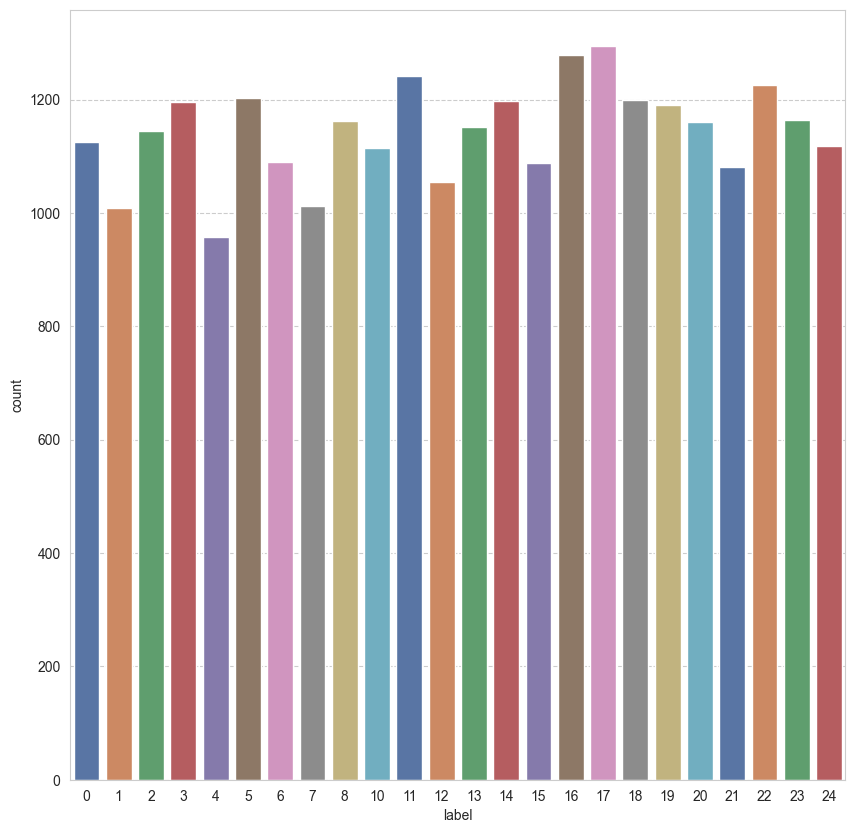

In [24]:
plt.figure(figsize = (10, 10))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.countplot(x='label', data=train, palette = 'deep')

In [25]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


In [27]:
train.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

In [28]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [29]:
train.isnull().values.any()

False

In [30]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew
861,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [31]:
train = train.drop([317,487, 595, 689, 802, 861], axis = 0)

In [32]:
train[train['pixel1'] == "fwefew"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [33]:
train = train.drop([727], axis = 0)

In [34]:
train = train.astype(str).astype(int)

In [35]:
train = train / 255
test = test / 255

In [36]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
